#### Install PyTorch
PyTorch (from Facebook) is NOT pre-installed on Googles CoLab 

In [1]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.6 kB/s 
     |████████████████████████████████| 8.8 MB 2.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.


# A Perceptron in PyTorch
implementing our Numpy model with PyTorch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generation
from sklearn.model_selection import train_test_split #for test set generation

In [3]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)
#y=y*2-1 #rescale to [-1,1]

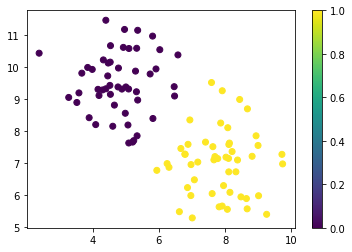

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

## Perceptron in PyTorch
* [PyTorch NN Module docu](https://pytorch.org/docs/stable/nn.html)

### define model

In [39]:
import torch 

class Perceptron(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(Perceptron, self).__init__()
        self.fc = torch.nn.Linear(2,1,bias=False) # Perceptron is single neuron "fully connected" (fc) -> linear unit with 2 inputs and 1 output 
        self.non_linear = torch.nn.Sigmoid() #non-linear activation 

    def forward(self, x): #build network
        output = self.fc(x) #w*X
        output = self.non_linear(output) # activation 
        return output

### prepare training and test data

In [40]:
#make blob data
x, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)

#split in train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#np->torch
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)



In [32]:
#have look
y_train

tensor([1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.])

### get instance of model
and set optimizer

In [52]:
#get instance of perceptron model
model = Perceptron()

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)    # 0.01

In [53]:
#run test data theogh untrained model
model.eval() #set to eval mode
model(x_test)

tensor([[0.9718],
        [0.7422],
        [0.9931],
        [0.9535],
        [0.6142],
        [0.9343],
        [0.4698],
        [0.5598],
        [0.9559],
        [0.9845],
        [0.5162],
        [0.9821],
        [0.6939],
        [0.9616],
        [0.3245],
        [0.8339],
        [0.6155],
        [0.9915],
        [0.9904],
        [0.9861],
        [0.4977],
        [0.5228],
        [0.7528],
        [0.8615],
        [0.7241],
        [0.7315],
        [0.9786],
        [0.9791],
        [0.9858],
        [0.5738],
        [0.6342],
        [0.9835],
        [0.9803]], grad_fn=<SigmoidBackward>)

### train

In [54]:
model.train() #set to train mode
epoch = 1000    # 50
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()


Epoch 0: train loss: 2.265535354614258
Epoch 1: train loss: 2.1020779609680176
Epoch 2: train loss: 1.9670295715332031
Epoch 3: train loss: 1.8577810525894165
Epoch 4: train loss: 1.770310401916504
Epoch 5: train loss: 1.7002230882644653
Epoch 6: train loss: 1.6434718370437622
Epoch 7: train loss: 1.5966793298721313
Epoch 8: train loss: 1.5571906566619873
Epoch 9: train loss: 1.522993564605713
Epoch 10: train loss: 1.49260675907135
Epoch 11: train loss: 1.4649580717086792
Epoch 12: train loss: 1.4392822980880737
Epoch 13: train loss: 1.4150421619415283
Epoch 14: train loss: 1.391863465309143
Epoch 15: train loss: 1.3694918155670166
Epoch 16: train loss: 1.3477522134780884
Epoch 17: train loss: 1.3265291452407837
Epoch 18: train loss: 1.3057444095611572
Epoch 19: train loss: 1.28534734249115
Epoch 20: train loss: 1.2653053998947144
Epoch 21: train loss: 1.245597243309021
Epoch 22: train loss: 1.2262095212936401
Epoch 23: train loss: 1.2071341276168823
Epoch 24: train loss: 1.18836569786

### evaluate

In [55]:
model.eval() #set model to eval mode

#train 
y_pred = model(x_train) #predict
y_pred = (y_pred>0.5).int().flatten() #argmax class lable
train_acc = y_train.shape[0]/torch.sum(y_pred == y_train.int()) #check result: devide num of samples by num of correct ones, need to cast to int
print("train ACC: ",train_acc.float())

train ACC:  tensor(1.)


In [56]:
#test 
y_pred = model(x_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = y_test.shape[0]/torch.sum(y_pred == y_test.int()) #check result: devide num of samples by num of correct ones, need to cast to int
print("test ACC: ",test_acc.float())

test ACC:  tensor(1.)


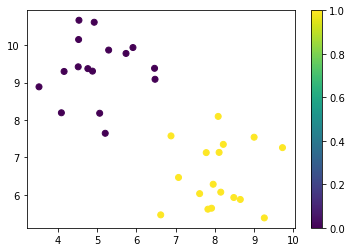

In [57]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.colorbar()